<a href="https://colab.research.google.com/github/pmama/Sentiment_Analysis/blob/main/sentiment_analysis_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://entrackr.com/storage/2019/02/Amazon-1.jpg)


## About Dataset
### Context
>This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

## Data includes:

- Reviews from Oct 1999 - Oct 2012
- 568,454 reviews
- 256,059 users
- 74,258 products
- 260 users with > 50 reviews
dataset_source= ['https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews']

In [21]:
#!pip install tqdm

# **Importing Necessary Libraies**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import  warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
colors = ['deeppink','royalblue','lightgreen','yellow','grey']

# **Loading and reading the Dataset**

In [23]:
dataset_path='Reviews.csv'
df = pd.read_csv(dataset_path)


df =df.head(10000)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ..."
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...


In [24]:

#df =df.head(10000)

# **Exploring the Dataset**

In [25]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [26]:
# we don't need 'ProfileName', 'Summary'
df = df.drop(['ProfileName', 'Summary',],axis=1)

In [27]:
df.shape

(10000, 8)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      10000 non-null  int64 
 1   ProductId               10000 non-null  object
 2   UserId                  10000 non-null  object
 3   HelpfulnessNumerator    10000 non-null  int64 
 4   HelpfulnessDenominator  10000 non-null  int64 
 5   Score                   10000 non-null  int64 
 6   Time                    10000 non-null  int64 
 7   Text                    10000 non-null  object
dtypes: int64(5), object(3)
memory usage: 625.1+ KB


In [29]:
df.duplicated().sum()

0

5    61.83
4    14.33
1     9.32
3     8.62
2     5.90
Name: Score, dtype: float64
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


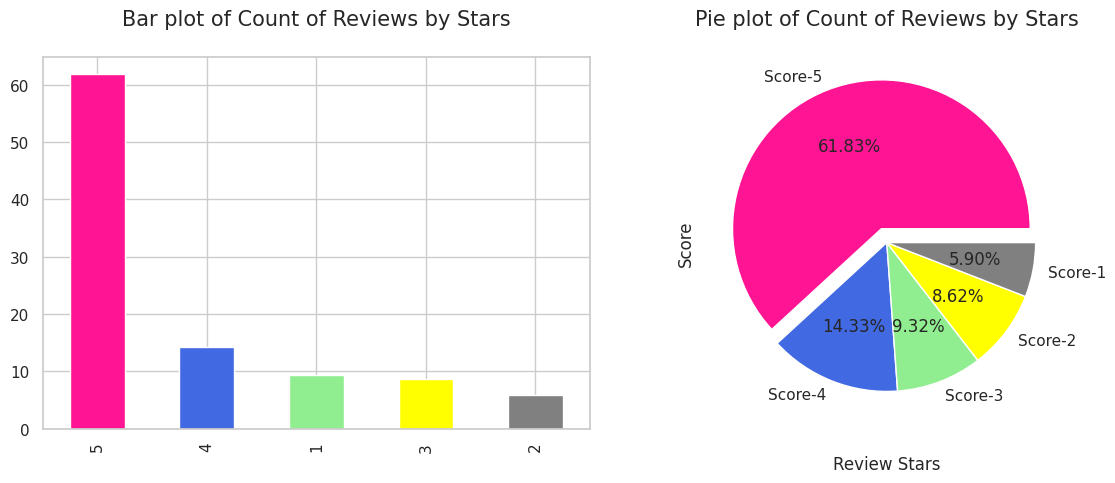

In [30]:
score_value_counts = df.Score.value_counts()*100/len(df)
print(score_value_counts)
print('---'*65)
fig, axs = plt.subplots(1,2, figsize=(12,5))
score_value_counts.plot(kind='bar', color =colors, ax=axs[0] )
plt.ylabel('Score Count')
plt.xlabel('\nReview Stars')
axs[0].set_title('Bar plot of Count of Reviews by Stars\n', fontsize = 15)
labels = ['Score-5', 'Score-4', 'Score-3', 'Score-2','Score-1']
score_value_counts.plot.pie(autopct='%1.2f%%',labels = labels, colors=colors, explode=[0.1,0.,0.,0.,0.],ax=axs[1] )
axs[1].set_title('Pie plot of Count of Reviews by Stars\n', fontsize = 15)
plt.tight_layout()
plt.show()


In [31]:
#df.nunique().sort_values().plot(kind='bar')
df.nunique().sort_values()

Score                         5
HelpfulnessNumerator         58
HelpfulnessDenominator       64
ProductId                  1422
Time                       1952
UserId                     9015
Text                       9513
Id                        10000
dtype: int64

In [32]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords') # for pronouns
nltk.download('vader_lexicon') # for +ve and -ve words used for sentiment
nltk.download('punkt')  # For abbriviation  and any shortform
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')
# nltk.data.path.append("/path/to/nltk_data")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Text preprocessing
- [x] Removing non-alphabet characters
- [x] Convert to lowercase
- [x] Tokenization
- [x] selecting stopwords
- [x] Filtering stopwords (Remove stopwords using NLTK's English stopwords list)
- [x] Lemmitization (choosing root words ( removing suffixes or prefixes))


In [33]:

corpus = []

# Loop through each message in the df['Text']

for i in tqdm(range(len(df)), desc="Processing Text"):
#     text = df['Text'][i]
#     cleaned_text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
#     cleantext = cleaned_text.lower()              # Convert to lowercase
#     words = word_tokenize(cleantext)  # selecting words
#     stop_words = set(stopwords.words('english')) # unique stopwords
#     filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords using NLTK's English stopwords list

#     lemmatizer = WordNetLemmatizer()
#     lemmatized_word = [lemmatizer.lemmatize(word) for word in filtered_words]  # root form ( removing suffixes or prefixes)
#     processed_text = ' '.join(lemmatized_word)  # Join the words back into a sentence
# #     ps = PorterStemmer()
# #     stem_words = [ps.stem(word) for word in filtered_words]
# #     processed_text = ' '.join(stem_words)  # Join the words back into a sentence
#     corpus.append(processed_text)
  text = df['Text'][i]
  if isinstance(text, str):
        cleaned_text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
        cleantext = cleaned_text.lower()              # Convert to lowercase
        words = word_tokenize(cleantext)             # Tokenize words
        stop_words = set(stopwords.words('english')) # Unique stopwords
        filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords using NLTK's English stopwords list

        lemmatizer = WordNetLemmatizer()
        lemmatized_word = [lemmatizer.lemmatize(word) for word in filtered_words]  # Root form (removing suffixes or prefixes)
        processed_text = ' '.join(lemmatized_word)  # Join the words back into a sentence

        corpus.append(processed_text)
  else:
        # Handle cases where 'text' is not a string, e.g., if it's NaN
        corpus.append('')  # Append an empty string or handle it as needed

Processing Text:   0%|          | 0/10000 [00:00<?, ?it/s]

In [34]:
df['processed_text'] = corpus
df

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,processed_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...
...,...,...,...,...,...,...,...,...,...
9995,9996,B000P41A28,A3A63RACXR1XIL,10,15,1,1204502400,we switched from the advance similac to the or...,switched advance similac organic product think...
9996,9997,B000P41A28,A5VVRGL8JA7R,2,3,5,1306368000,"Like the bad reviews say, the organic formula ...",like bad review say organic formula constipate...
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,0,0,5,1347494400,I wanted to solely breastfeed but was unable t...,wanted solely breastfeed unable keep supplemen...
9998,9999,B000P41A28,AUV4GIZZE693O,1,2,5,1203638400,i love the fact that i can get this delieved t...,love fact get delieved house delievy charge ha...


# Sentiment Analysis using Vader

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [36]:
sia = SentimentIntensityAnalyzer()

In [37]:
example = df['processed_text'][0]
example

'bought several vitality canned dog food product found good quality product look like stew processed meat smell better labrador finicky appreciates product better'

In [38]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'compound': 0.9413}

In [39]:
# res = {} # initialising an empty dictionary to store sentiment score

# for index, row in df.iterrows():
# #     text = row['Text']
#     text = row['processed_text']
#     res[index] = sia.polarity_scores(text)


In [40]:
res = {} # initialising an empty dictionary to store sentiment score
for index,row in tqdm(df.iterrows(),total= len(df)):
    text = row['processed_text']
    res[index] = sia.polarity_scores(text)


  0%|          | 0/10000 [00:00<?, ?it/s]

In [41]:
vaders = pd.DataFrame(res).T
vaders.reset_index().rename(columns={'index' : 'Id'})
vaders

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.132,0.576,0.292,0.8624
3,0.000,0.854,0.146,0.4404
4,0.000,0.369,0.631,0.9468
...,...,...,...,...
9995,0.149,0.753,0.098,-0.5267
9996,0.108,0.593,0.298,0.8360
9997,0.030,0.760,0.210,0.9371
9998,0.096,0.616,0.288,0.5859


In [42]:
vaders.shape

(10000, 4)

In [43]:
df.shape

(10000, 9)

In [44]:
new_df = pd.concat([vaders,df], axis=1)
new_df

,neg,neu,pos,compound,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,processed_text
0,0.000,0.503,0.497,0.9413,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,0.129,0.762,0.110,-0.1027,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...
2,0.132,0.576,0.292,0.8624,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,0.000,0.854,0.146,0.4404,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,0.000,0.369,0.631,0.9468,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.149,0.753,0.098,-0.5267,9996,B000P41A28,A3A63RACXR1XIL,10,15,1,1204502400,we switched from the advance similac to the or...,switched advance similac organic product think...
9996,0.108,0.593,0.298,0.8360,9997,B000P41A28,A5VVRGL8JA7R,2,3,5,1306368000,"Like the bad reviews say, the organic formula ...",like bad review say organic formula constipate...
9997,0.030,0.760,0.210,0.9371,9998,B000P41A28,A2TGDTJ8YCU6PD,0,0,5,1347494400,I wanted to solely breastfeed but was unable t...,wanted solely breastfeed unable keep supplemen...
9998,0.096,0.616,0.288,0.5859,9999,B000P41A28,AUV4GIZZE693O,1,2,5,1203638400,i love the fact that i can get this delieved t...,love fact get delieved house delievy charge ha...


In [45]:
new_df.Score.value_counts()

5    6183
4    1433
1     932
3     862
2     590
Name: Score, dtype: int64

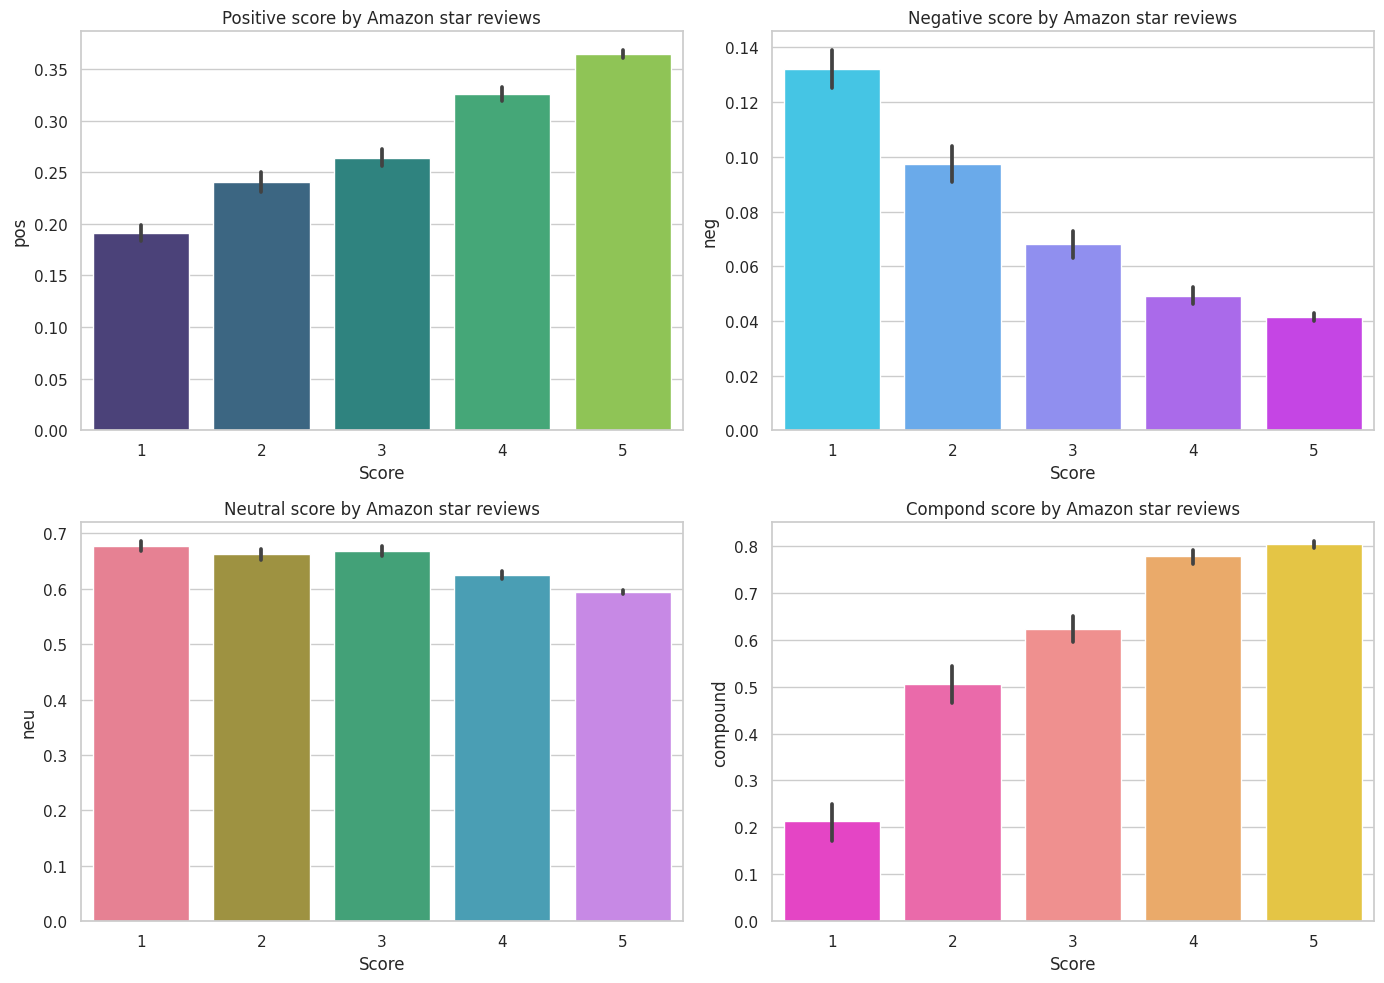

In [46]:
plt.figure(figsize =(14,10))
plt.subplot(221)
sns.barplot(data = new_df, x='Score', y='pos', palette='viridis' )
plt.title('Positive score by Amazon star reviews')
plt.subplot(222)
sns.barplot(data = new_df, x='Score', y='neg',palette='cool')
plt.title('Negative score by Amazon star reviews')
plt.subplot(223)
sns.barplot(data = new_df, x='Score', y='neu',palette='husl')
plt.title('Neutral score by Amazon star reviews')
plt.subplot(224)
sns.barplot(data = new_df, x='Score', y='compound',palette='spring')
plt.title('Compond score by Amazon star reviews')
plt.tight_layout()
plt.show()

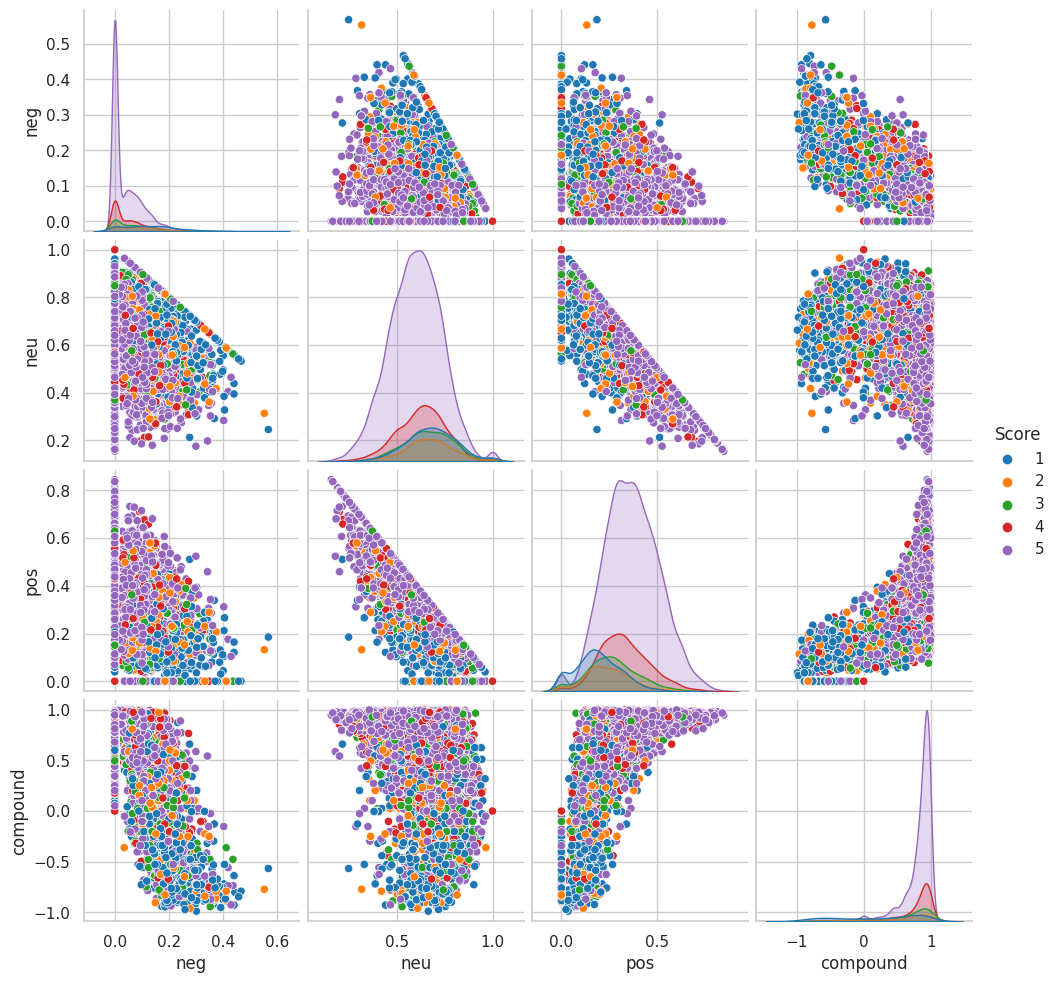

In [47]:
sns.pairplot(data= new_df, vars=['neg', 'neu','pos', 'compound'], hue= 'Score', palette='tab10')
plt.show()

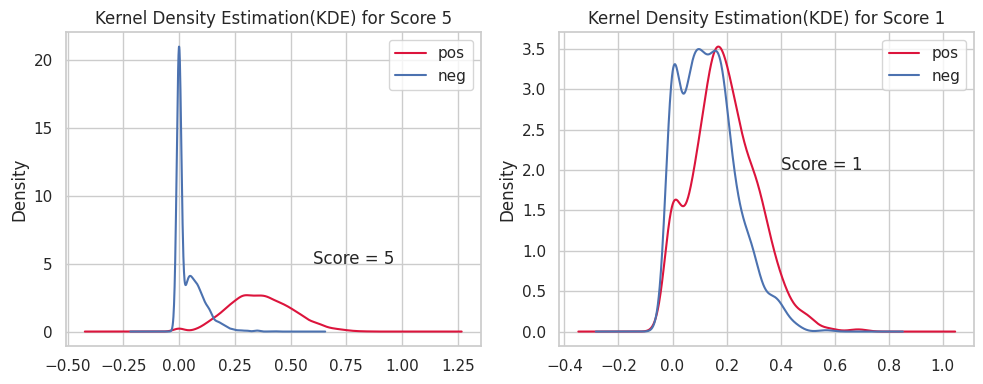

In [48]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
new_df[new_df.Score ==5].sort_values('pos', ascending= False)[['pos']].plot(kind='kde',ax=ax[0], color = 'crimson')
new_df[new_df.Score ==5].sort_values('neg', ascending= False)[['neg']].plot(kind='kde' ,ax=ax[0])
ax[0].set_title('Kernel Density Estimation(KDE) for Score 5')
ax[0].text(0.6, 5.0, 'Score = 5', )
new_df[new_df.Score ==1].sort_values('pos', ascending= False)[['pos']].plot(kind='kde',ax=ax[1],  color = 'crimson')
new_df[new_df.Score ==1].sort_values('neg', ascending= False)[['neg']].plot(kind='kde',ax=ax[1])
ax[1].set_title('Kernel Density Estimation(KDE) for Score 1')
ax[1].text(0.4, 2.0, 'Score = 1', )
plt.tight_layout()
plt.show()

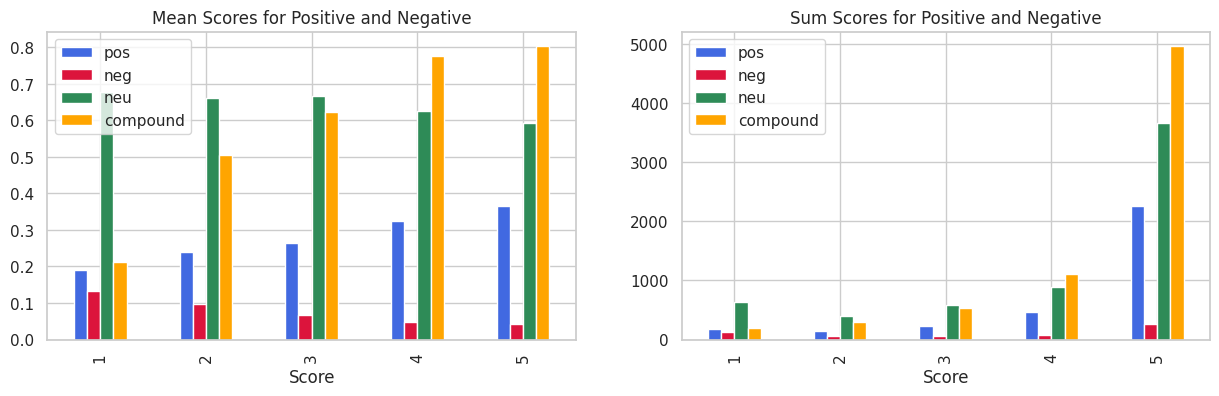

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
colors=[ 'royalblue','crimson','seagreen','orange']

new_df.groupby('Score')[['pos', 'neg','neu','compound']].mean().plot(kind='bar', color=colors,ax = ax[0] )
ax[0].set_title('Mean Scores for Positive and Negative')

new_df.groupby('Score')[['pos', 'neg','neu', 'compound']].sum().plot(kind='bar', color=colors, ax =ax[1])
ax[1].set_title('Sum Scores for Positive and Negative')
plt.title
plt.show()


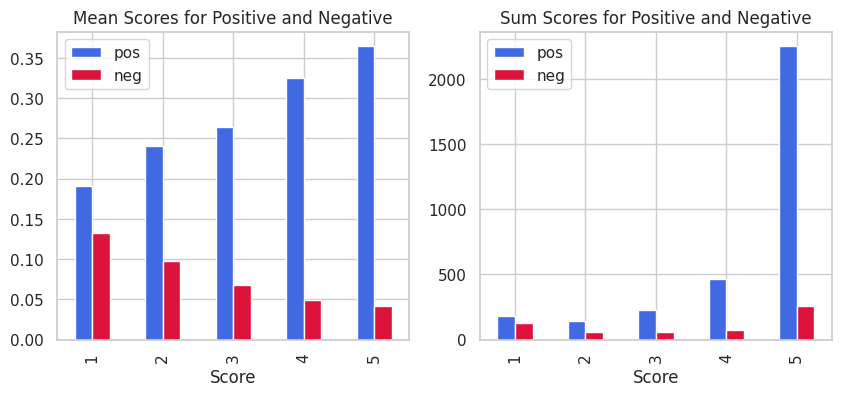

            pos       neg       neu       pos      neg       neu
Score                                                           
1      0.191157  0.131986  0.676850   178.158  123.011   630.824
2      0.240517  0.097376  0.662103   141.905   57.452   390.641
3      0.264261  0.068013  0.667703   227.793   58.627   575.560
4      0.325611  0.049172  0.625202   466.601   70.464   895.915
5      0.364733  0.041312  0.593956  2255.142  255.431  3672.428



In [50]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

new_df.groupby('Score')[['pos', 'neg']].mean().plot(kind='bar', color=colors,ax = ax[0] )
ax[0].set_title('Mean Scores for Positive and Negative')

new_df.groupby('Score')[['pos', 'neg']].sum().plot(kind='bar', color=colors, ax =ax[1])
ax[1].set_title('Sum Scores for Positive and Negative')
plt.title
plt.show()
print(pd.concat([new_df.groupby('Score')[['pos', 'neg','neu']].mean(),new_df.groupby('Score')[['pos', 'neg','neu']].sum()], axis=1))
print()

5    61.83
4    14.33
1     9.32
3     8.62
2     5.90
Name: Score, dtype: float64
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


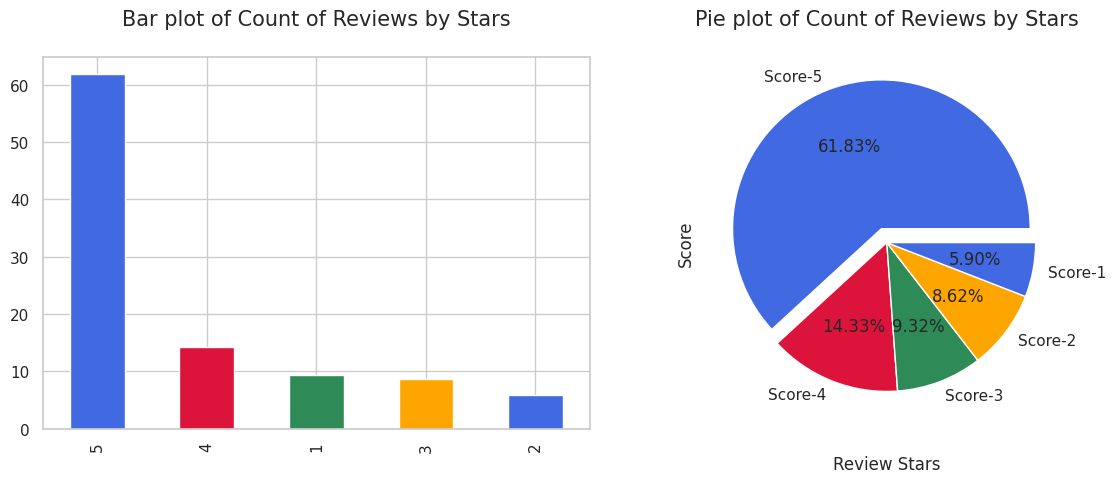

In [51]:
score_value_counts = (new_df[new_df['pos']>=0]['Score']).value_counts()*100/len(df)
print(score_value_counts)
print('---'*65)
fig, axs = plt.subplots(1,2, figsize=(12,5))
score_value_counts.plot(kind='bar', color =colors, ax=axs[0] )
plt.ylabel('Score Count')
plt.xlabel('\nReview Stars')
axs[0].set_title('Bar plot of Count of Reviews by Stars\n', fontsize = 15)
labels = ['Score-5', 'Score-4', 'Score-3', 'Score-2','Score-1']
score_value_counts.plot.pie(autopct='%1.2f%%',labels = labels, colors=colors, explode=[0.1,0.,0.,0.,0.],ax=axs[1] )
axs[1].set_title('Pie plot of Count of Reviews by Stars\n', fontsize = 15)
plt.tight_layout()
plt.show()

In [52]:
from wordcloud import WordCloud
wc = WordCloud(width=800,
               height=400,
               min_font_size=2,
               max_font_size=100,
               min_word_length=3,
               max_words=100,
               background_color='white',
               colormap='Reds'
              )
wc1 = WordCloud(width=800,
               height=400,
               min_font_size=5,
               max_font_size=100,
               min_word_length=3,
               max_words=100,
               background_color='white',
               colormap='Blues'
              )

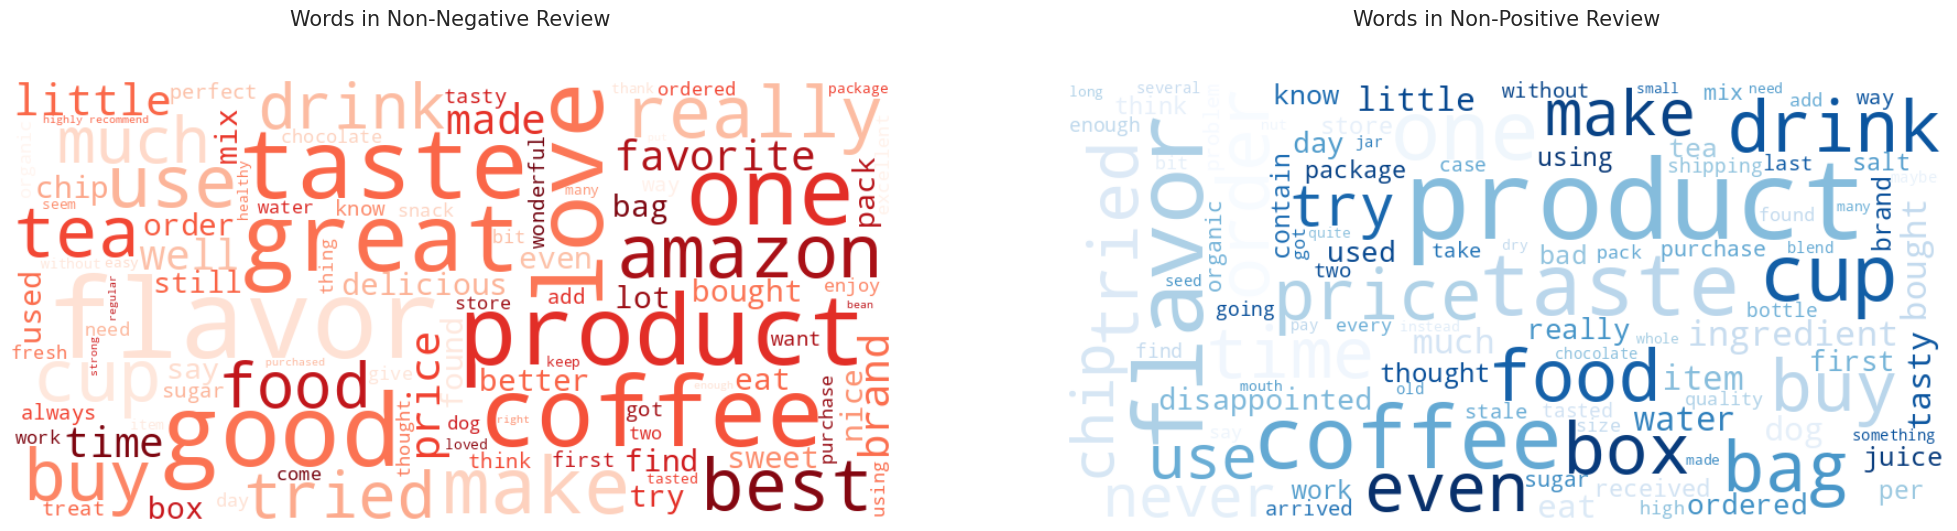

In [53]:

plt.figure(figsize=(25, 8))
plt.subplot(121)
wc_pos = wc.generate(new_df[new_df['neg']==0]['processed_text'].str.cat(sep = " "))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Words in Non-Negative Review\n\n', fontsize=15)

plt.subplot(122)

wc_neg = wc1.generate(new_df[new_df['pos']==0]['processed_text'].str.cat(sep = " "))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Words in Non-Positive Review\n\n', fontsize=15)
plt.show()


In [74]:
df1= new_df.copy()
negative_condition = ((df1['compound'] < 0) & (df1['neg']!=0))
positive_condition = ((df1['pos'] != 0) & (df1['neg']==0))
neutral_condition = ((df1['pos'] != 0) & (df1['neg']!=0) | (df1['pos'] == 0) & (df1['neg']==0) )


conditions = [negative_condition, positive_condition, neutral_condition]
values = ['neg', 'pos', 'neu']

df1['sentiment'] = np.select(conditions, values)


In [75]:
df1.sentiment.value_counts()


neu    4800
pos    4486
neg     714
Name: sentiment, dtype: int64

neu    48.00
pos    44.86
neg     7.14
Name: sentiment, dtype: float64
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


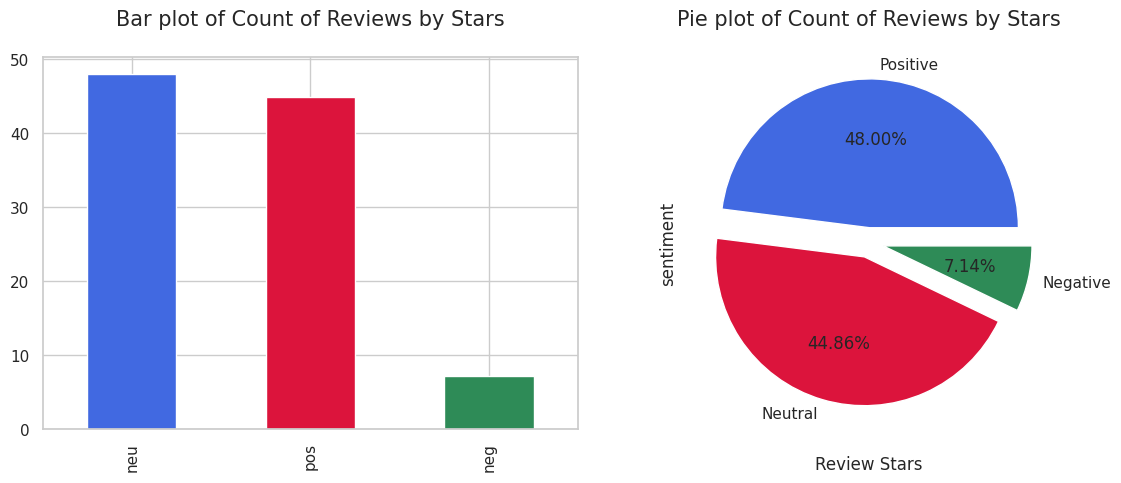

In [77]:
sentiment_value_counts = df1.sentiment.value_counts()*100/len(df)
print(sentiment_value_counts)
print('---'*65)
fig, axs = plt.subplots(1,2, figsize=(12,5))
sentiment_value_counts.plot(kind='bar', color =colors, ax=axs[0], )
plt.ylabel('Score Count')
plt.xlabel('\nReview Stars')
axs[0].set_title('Bar plot of Count of Reviews by Stars\n', fontsize = 15)
labels = ['Positive','Neutral','Negative']
sentiment_value_counts.plot.pie(autopct='%1.2f%%',labels = labels, colors=colors, explode=[0.1,0.1,0.1],ax=axs[1] )
axs[1].set_title('Pie plot of Count of Reviews by Stars\n', fontsize = 15)
plt.tight_layout()
plt.show()

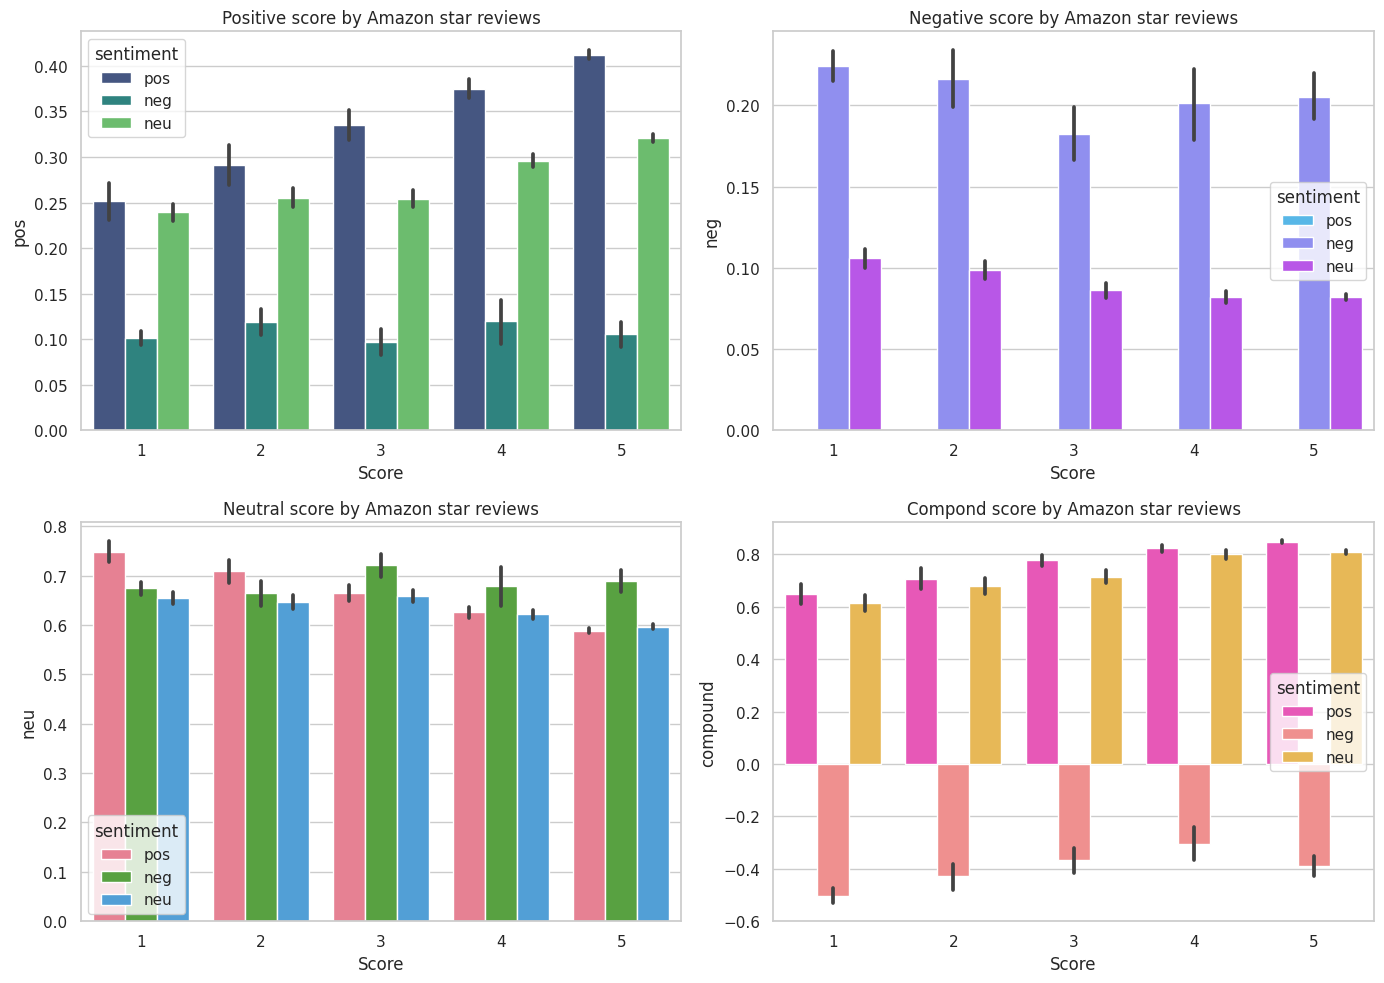

In [78]:
plt.figure(figsize =(14,10))
plt.subplot(221)
sns.barplot(data = df1, x='Score', y='pos', palette='viridis', hue= 'sentiment' )
plt.title('Positive score by Amazon star reviews')
plt.subplot(222)
sns.barplot(data = df1, x='Score', y='neg',palette='cool',hue= 'sentiment')
plt.title('Negative score by Amazon star reviews')
plt.subplot(223)
sns.barplot(data = df1, x='Score', y='neu',palette='husl', hue= 'sentiment')
plt.title('Neutral score by Amazon star reviews')
plt.subplot(224)
sns.barplot(data = df1, x='Score', y='compound',palette='spring', hue= 'sentiment')
plt.title('Compond score by Amazon star reviews')
plt.tight_layout()
plt.show()

# Model Building

In [79]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve,roc_auc_score, auc

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
vc = CountVectorizer()
feature = vc.fit_transform(new_df['processed_text']).toarray()
print(feature.shape)
feature

(10000, 16106)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [81]:
# Define a function to convert values
def convert_score(score):
    if score >= 3:
        return 1
    else:
        return 0

# new_df['Score'] = new_df['Score'].apply(convert_score)
# new_df['Score'].unique()

In [82]:
# new_score_count =new_df['Score'].value_counts()*100/len(new_df)

# new_score_count.plot.pie(autopct='%1.2f%%',labels=['good','bad'], colors=colors, explode=[0.1,0.],)

In [83]:
x=feature
#y=new_df['Score']
y=df1['sentiment']

In [84]:
y = y.astype('category')
y = y.cat.codes

In [85]:
y.value_counts()*100/len(y)

1    48.00
2    44.86
0     7.14
dtype: float64

In [86]:
from imblearn.over_sampling import  SMOTE
smote = SMOTE()
x_over, y_over = smote.fit_resample(x,y)

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.25, random_state=121, stratify=y_over)

In [88]:
mnb=MultinomialNB()
gnb= GaussianNB()
bnb=BernoulliNB()

models =[('MultinomialNB', mnb),('GaussianNB',gnb), ('BernoulliNB',bnb)]

from tabulate import tabulate
print(tabulate(models, headers=['Model name', 'Sklearn models']),)

Model name     Sklearn models
-------------  ----------------
MultinomialNB  MultinomialNB()
GaussianNB     GaussianNB()
BernoulliNB    BernoulliNB()


Training Models:   0%|          | 0/3 [00:00<?, ?it/s]

MultinomialNB
▬ Training Accuracy(CrossValidation), 75.0 %
Test confusion matrix :
 [[864 229 107]
 [ 30 965 205]
 [ 14 327 859]]

Test ROC-AUC : 0.53


<Figure size 800x350 with 0 Axes>

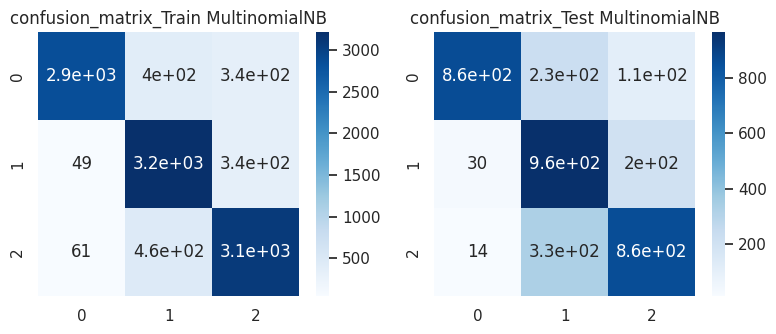

GaussianNB
▬ Training Accuracy(CrossValidation), 70.0 %
Test confusion matrix :
 [[1077  107   16]
 [ 154  881  165]
 [ 305  312  583]]

Test ROC-AUC : 0.64


<Figure size 800x350 with 0 Axes>

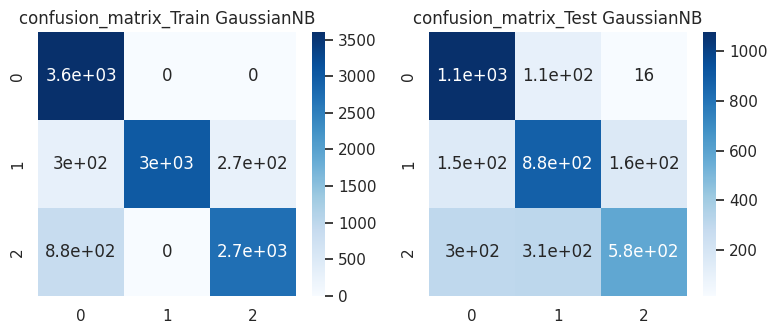

BernoulliNB
▬ Training Accuracy(CrossValidation), 73.0 %
Test confusion matrix :
 [[1090   84   26]
 [ 132  694  374]
 [ 180  180  840]]

Test ROC-AUC : 0.62


<Figure size 800x350 with 0 Axes>

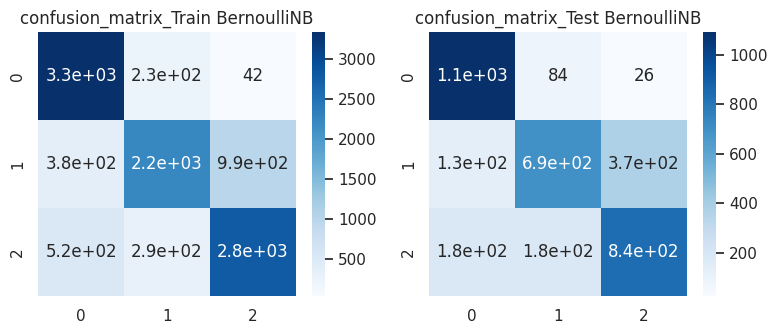

In [100]:

for model_name, model in tqdm(models, desc="Training Models"):
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    print('==='*10)
    print(model_name)
    print('==='*10)
#=======================================================
#            Cross Validation
#--------------------------------------------------------
    CV_train_acc =(cross_val_score(model, x_train, y_train, cv =10).mean()).round(2)*100
    #CV_test_acc =(cross_val_score(model, x_test, y_test, cv =10).mean()).round(2)*100

    print(f'▬ Training Accuracy(CrossValidation), {CV_train_acc} %' )


    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)


    fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=1)
    roc_auc = auc(fpr, tpr)

    print(f'Test confusion matrix :\n {cm_test}')
    print()
    print(f'Test ROC-AUC : {roc_auc:.2f}')

    plt.figure(figsize = (8,3.5))

    plt.figure(figsize = (8,3.5))
    plt.subplot(1,2,1)
    sns.heatmap(cm_train, annot = True, cmap= 'Blues')
    plt.title(f'confusion_matrix_Train {model_name}')

    plt.subplot(1,2,2)
    sns.heatmap(cm_test, annot = True, cmap= 'Blues')
    plt.title(f'confusion_matrix_Test {model_name}')
    plt.tight_layout()
    plt.show()

model_name :  RandomForest
▬ Training Accuracy(CrossValidation), 73.0 %
Train confusion matrix :
 [[3332  226   42]
 [ 375 2238  987]
 [ 521  287 2792]]

Test confusion matrix :
 [[1090   84   26]
 [ 132  694  374]
 [ 180  180  840]]

Test ROC-AUC : 0.62


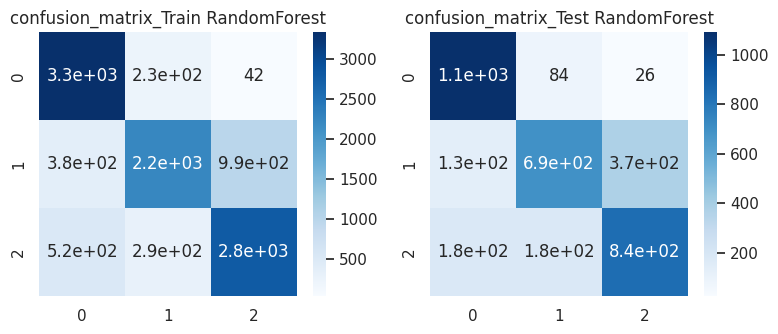

In [101]:
from sklearn.ensemble import RandomForestClassifier

model_name='RandomForest'
print('==='*10)
print('model_name : ', model_name)
print('==='*10)
#=====================================================
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(x_train,y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#=======================================================
#            Cross Validation
#--------------------------------------------------------
CV_train_acc =(cross_val_score(model, x_train, y_train, cv =10).mean()).round(2)*100
CV_test_acc =(cross_val_score(model, x_test, y_test, cv =10).mean()).round(2)*100

print(f'▬ Training Accuracy(CrossValidation), {CV_train_acc} %' )

cm_test = confusion_matrix(y_test, y_pred_test)
cm_train = confusion_matrix(y_train, y_pred_train)


fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=1)
roc_auc = auc(fpr, tpr)
print(f'Train confusion matrix :\n {cm_train}')
print()
print(f'Test confusion matrix :\n {cm_test}')
print()
print(f'Test ROC-AUC : {roc_auc:.2f}')

plt.figure(figsize = (8,3.5))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot = True, cmap= 'Blues')
plt.title(f'confusion_matrix_Train {model_name}')

plt.subplot(1,2,2)
sns.heatmap(cm_test, annot = True, cmap= 'Blues')
plt.title(f'confusion_matrix_Test {model_name}')
plt.tight_layout()
# Show the plot
plt.show()

# Conclusion :
- To manage runtime efficiently, I carefully selected a smaller subset of 10,000 records for analysis. This allowed me to work with a manageable dataset while still gaining valuable insights.

- Text Preprocessing with NLTK: Leveraging the power of NLTK, I performed essential text preprocessing tasks to ensure data quality and consistency. This step lays a solid foundation for accurate sentiment analysis.

- Vader Sentiment Analysis: I adopted the Vader sentiment analysis model to generate sentiment labels (the dependent variable). Vader is a robust choice for this task, providing quick and reliable sentiment categorization.

- Machine Learning Models: To predict sentiment labels, I employed both Naive Bayes and ensemble models. Through the use of 10-fold cross-validation, I achieved a commendable level of accuracy, showcasing the potential of these models in sentiment analysis tasks.

- Room for Improvement: While the project has delivered promising results, there is significant room for enhancement. Hyperparameter tuning, a valuable technique for fine-tuning models, remains unexplored in this project. This presents an exciting opportunity to further boost accuracy and refine the models.








